# Enron Email Dataset Analysis - Part 1

### Importing Libraries

In [162]:
import os
import pandas as pd
from email.parser import Parser
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import nltk
from nltk import sent_tokenize as ST
from nltk import word_tokenize as WT
from nltk.stem import PorterStemmer as PS
from nltk.stem import WordNetLemmatizer as WNL
from nltk.corpus import stopwords

### Defining the root folders

In [3]:
root_folder = 'E:\\Python Projects\\Enron\\Dataset\\enron_mail_20150507\\maildir\\'
path = "E:\\Python Projects\\Enron\\Dataset\\enron_mail_20150507\\maildir\\allen-p\\_sent_mail\\1"

In [4]:
# Defining empty lists for storing paths to all mails and list of all employees
mail_list = []
emp_list = []

#### A quick look at the database and we can see there are multiple folders and equally large number of sub folders  with a lot of email data inside each. 
We will try to automate the process and generate two lists here :
    1. a list of all root folders.
    2. a list of path to all email files so that it can be read later on and fed in to a dataframe.

In [5]:
for r, d, f in os.walk(root_folder):
    for file in f:
        mail_list.append(os.path.join(r,file))

In [6]:
# there are a total of 517401 emails combined.
print('Total emails found : ' , len(mail_list))
print('A sample of the path to emails found is as : \n', mail_list[0])

Total emails found :  517401
A sample of the path to emails found is as : 
 E:\Python Projects\Enron\Dataset\enron_mail_20150507\maildir\allen-p\all_documents\1


In [7]:
# similarly, we can have a list of all employees whose emails have been put into the dataset. Following for loop will create
# a list of various lists. We will need the first list from it.
for r, d, f in os.walk("E:\\Python Projects\\Enron\\Dataset\\enron_mail_20150507\\maildir"):
    emp_list.append(d)

In [8]:
# the first list has 150 enetries, which means we have 150 employees. There names can be printed as shown.
print('Names of the first five employees :', emp_list[0][0:5])

Names of the first five employees : ['allen-p', 'arnold-j', 'arora-h', 'badeer-r', 'bailey-s']


### Defining empty DF for storing the content of emails

In [15]:
df_email_details = pd.DataFrame(columns = ['Path', 'Message_ID', 'From','To','Subject','Time/Date','Message_Body'])
df_email_details

,Path,Message_ID,From,To,Subject,Time/Date,Message_Body


In [16]:
for p in mail_list[0:500]:
    with open(p, "r") as f:
            data = f.read()
            email = Parser().parsestr(data)
            df_email_details = df_email_details.append({'Path': p,
                                                        'Message_ID': email['Message-ID'], 
                                                        'From' : email['from'],
                                                        'To': email['to'],
                                                        'Subject': email['Subject'],
                                                        'Time/Date' : email['date'],
                                                        'Message_Body': email.get_payload()}, ignore_index = True)

In [227]:
df_email_details.head(4)

,Path,Message_ID,From,To,Subject,Time/Date,Message_Body,Weekday,Time and Date
0,E:\Python Projects\Enron\Dataset\enron_mail_20...,<29790972.1075855665306.JavaMail.evans@thyme>,1.11913372.-2@multexinvestornetwork.com,pallen@enron.com,"December 14, 2000 - Bear Stearns' predictions ...","Wed, 13 Dec 2000 18:41:00 -0800 (PST)",In today's Daily Update you'll find free repor...,Wed,2000-12-13 18:41:00
1,E:\Python Projects\Enron\Dataset\enron_mail_20...,<21975671.1075855665520.JavaMail.evans@thyme>,messenger@ecm.bloomberg.com,None,Bloomberg Power Lines Report,"Wed, 13 Dec 2000 08:35:00 -0800 (PST)",Here is today's copy of Bloomberg Power Lines....,Wed,2000-12-13 08:35:00
2,E:\Python Projects\Enron\Dataset\enron_mail_20...,<7452188.1075855667684.JavaMail.evans@thyme>,phillip.allen@enron.com,keith.holst@enron.com,Consolidated positions: Issues & To Do list,"Mon, 9 Oct 2000 07:16:00 -0700 (PDT)",---------------------- Forwarded by Phillip K ...,Mon,2000-10-09 07:16:00
3,E:\Python Projects\Enron\Dataset\enron_mail_20...,<23790115.1075855667708.JavaMail.evans@thyme>,phillip.allen@enron.com,keith.holst@enron.com,Consolidated positions: Issues & To Do list,"Mon, 9 Oct 2000 07:00:00 -0700 (PDT)",---------------------- Forwarded by Phillip K ...,Mon,2000-10-09 07:00:00


In [18]:
# we need to convert the date/time column into a python datetime format column.
# creating lists for the same
weekday_list = []
time_date = []

In [19]:
# First 3 letters in the current single entry in the dataframe column of date/time has the weekday mentioned.
for i,day in enumerate(df_email_details['Time/Date']):
    weekday_list.append(day[0:3])
    time_date.append(day[5:])

In [20]:
# Since the dates in the current form are without 0 padding in the prefix, we need to correct it to be able to use datetime python library functins on it.
for i,d in enumerate(time_date):
    if len(d)<32:
        time_date[i]='0'+time_date[i]
        

In [21]:
# Applying the datetime conversion
for i,d in enumerate(time_date):
    time_date[i]=dt.strptime(d[:-12], '%d %b %Y %H:%M:%S')
    #time_date[i]=dt(int(d[:2]),x[])

In [22]:
# insertig the lists into the dataframe as new columns
df_email_details['Weekday'] = weekday_list

In [23]:
df_email_details['Time and Date'] = time_date

In [24]:
df_email_details.head(2)

,Path,Message_ID,From,To,Subject,Time/Date,Message_Body,Weekday,Time and Date
0,E:\Python Projects\Enron\Dataset\enron_mail_20...,<29790972.1075855665306.JavaMail.evans@thyme>,1.11913372.-2@multexinvestornetwork.com,pallen@enron.com,"December 14, 2000 - Bear Stearns' predictions ...","Wed, 13 Dec 2000 18:41:00 -0800 (PST)",In today's Daily Update you'll find free repor...,Wed,2000-12-13 18:41:00
1,E:\Python Projects\Enron\Dataset\enron_mail_20...,<21975671.1075855665520.JavaMail.evans@thyme>,messenger@ecm.bloomberg.com,None,Bloomberg Power Lines Report,"Wed, 13 Dec 2000 08:35:00 -0800 (PST)",Here is today's copy of Bloomberg Power Lines....,Wed,2000-12-13 08:35:00


# Data Analysis

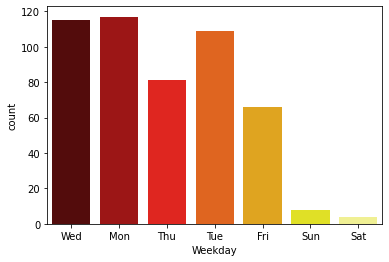

In [38]:
# Plotting some graphs
# trend of count of emails exchanged over a week
sns.countplot(x='Weekday',
             data = df_email_details,
             palette = 'hot')